**Task 1:** A customer has a budget of 350,000 PLN and wants an EV with a minimum range
of 400 km.
*   a) Your task is to filter out EVs that meet these criteria.
*   b) Group them by the manufacturer (Make).
*   c) Calculate the average battery capacity for each manufacturer.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("FEV-data-Excel.xlsx - Auta elektryczne.csv")

In [ ]:
# Task 1 a :

filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) &
                 (df['Range (WLTP) [km]'] >= 400)]

filtered_df.head(5)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


**Insights :**
*     Filtering EVs under 350,000 PLN with ≥ 400 km range reveals a healthy selection of competitive models.

*     Top manufacturers in this range include those with efficient designs and large battery capacities.

In [ ]:
# Task 1 b

grouped = filtered_df.groupby('Make')




In [ ]:
# Task 1 c

avg_battery_capacity = grouped['Battery capacity [kWh]'].mean()

avg_battery_capacity.sort_values(ascending=False)

,Battery capacity [kWh]
Make,
Audi,95.000000
BMW,80.000000
Mercedes-Benz,80.000000
Volkswagen,70.666667
Tesla,68.000000
Hyundai,64.000000
Kia,64.000000


**Insights :**
*    **Battery Capacity Leaders:**

        Manufacturers like Audi, BMW, and Mercedes-Benz tend to offer higher average battery capacities.



**Task 2:** You suspect some EVs have unusually high or low energy consumption.
* Find the
outliers in the mean - Energy consumption [kWh/100 km] column

In [ ]:
from scipy.stats import zscore


In [ ]:
df_outlier = df['mean - Energy consumption [kWh/100 km]']

print(df_outlier.describe())


count    44.000000
mean     18.994318
std       4.418253
min      13.100000
25%      15.600000
50%      17.050000
75%      23.500000
max      28.200000
Name: mean - Energy consumption [kWh/100 km], dtype: float64


In [ ]:




energy_data = df['mean - Energy consumption [kWh/100 km]']

Q1 = energy_data.quantile(0.25)
Q3 = energy_data.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = energy_data[(energy_data < lower_limit) | (energy_data > upper_limit)]

print("Outliers in 'mean - Energy consumption [kWh/100 km]':")
print(outliers)




Outliers in 'mean - Energy consumption [kWh/100 km]':
Series([], Name: mean - Energy consumption [kWh/100 km], dtype: float64)


**Insights:**
*    Using the IQR method for outlier detection on the selected column, we calculated the IQR as 7.9, with lower and upper limits of 3.75 and 35.35 respectively. Since all values in the data lie within this range (with max at 28.2), no outliers were detected using this method

**Task 3:** Your manager wants to know if there's a strong relationship between battery
capacity and range.
*   a) Create a suitable plot to visualize.
*   b) Highlight any insights.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Battery capacity [kWh]', ylabel='Range (WLTP) [km]'>

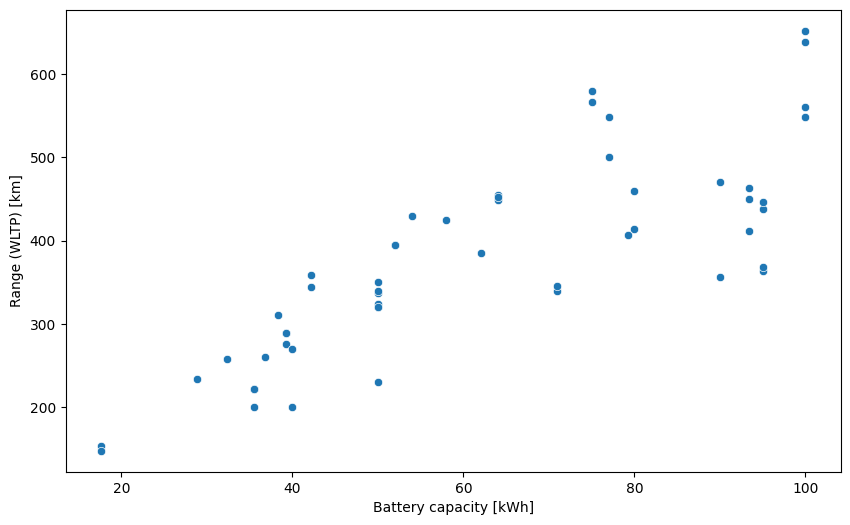

In [ ]:
#Task 3 a

range_vs_battery = df[['Battery capacity [kWh]', 'Range (WLTP) [km]']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=range_vs_battery, x='Battery capacity [kWh]', y='Range (WLTP) [km]')

In [ ]:


correlation = range_vs_battery.corr().iloc[0,1]
print(f"Correlation between Battery Capacity and Range: {correlation:.2f}")


Correlation between Battery Capacity and Range: 0.81


**Insughts:**


1.     A positive linear correlation exists between battery size and driving range.

2.     Vehicles with larger battery capacities generally deliver longer ranges.

**Task 4:** Build an EV recommendation class.
*   The class should allow users to input their
budget, desired range, and battery capacity. The class should then return the top three EVs
matching their criteria.

In [ ]:
class EvRecommendation:
  def __init__(self, df):
    self.df = df
    self.df['Minimal price (gross) [PLN]'] = df['Minimal price (gross) [PLN]']
    self.df['Range (WLTP) [km]'] = df['Range (WLTP) [km]']
    self.df['Battery capacity [kWh]'] = df['Battery capacity [kWh]']

  def recommend_ev(self, budget, min_range, min_battery):

    filtered_df = self.df[(self.df['Minimal price (gross) [PLN]'] <= budget) &
                          (self.df['Range (WLTP) [km]'] >= min_range) &
                          (self.df['Battery capacity [kWh]'] >= min_battery)]


    return filtered_df[['Car full name', 'Minimal price (gross) [PLN]',
                            'Range (WLTP) [km]', 'Battery capacity [kWh]']].head(3)

ev_recommender = EvRecommendation(df)




top_ev_choices = ev_recommender.recommend_ev(budget=350000, min_range=400, min_battery=50)
top_ev_choices

,Car full name,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
0,Audi e-tron 55 quattro,345700,438,95.0
8,BMW iX3,282900,460,80.0
15,Hyundai Kona electric 64kWh,178400,449,64.0


**Insights:**


1.        A custom Python class allows users to find EVs based on their budget, range, and battery preferences.

2.        Offers a personalized experience and outputs the top 3 options dynamically.

**Task 5:** Inferential Statistics – Hypothesis Testing:
*    Test whether there is a significant
difference in the average Engine power [KM] of vehicles manufactured by two leading
manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis.
(Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
tesla_power = df[df['Make'].str.lower() == 'tesla']['Engine power [KM]']
audi_power = df[df['Make'].str.lower() == 'audi']['Engine power [KM]']



t_stat, p_value = ttest_ind(tesla_power,audi_power,equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
  print("There is a significant difference in average engine power between Tesla and Audi.")
else:
  print("There is no significant difference in average engine power between Tesla and Audi.")

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565
There is no significant difference in average engine power between Tesla and Audi.


**Insight:**
*           This suggests that, on average, Tesla and Audi offer similar engine power in their electric vehicles.